In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
file_path = r"C:\Users\hp\Downloads\myexcel.xlsx"
df = pd.read_excel(file_path)
# Display the first few rows to understand the data
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [25]:
#checking missing value

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [27]:
# Replace 'height' column with random values between 150 and 180
df["height"] = np.random.randint(150, 181, df.shape[0])

# Confirm the changes
df["height"].describe()


count    458.000000
mean     164.711790
std        9.128305
min      150.000000
25%      157.000000
50%      164.000000
75%      172.000000
max      180.000000
Name: height, dtype: float64

                      Team  Employee Count  Percentage
0     New Orleans Pelicans              19    4.148472
1        Memphis Grizzlies              18    3.930131
2                Utah Jazz              16    3.493450
3          New York Knicks              16    3.493450
4          Milwaukee Bucks              16    3.493450
5            Brooklyn Nets              15    3.275109
6   Portland Trail Blazers              15    3.275109
7    Oklahoma City Thunder              15    3.275109
8           Denver Nuggets              15    3.275109
9       Washington Wizards              15    3.275109
10              Miami Heat              15    3.275109
11       Charlotte Hornets              15    3.275109
12           Atlanta Hawks              15    3.275109
13       San Antonio Spurs              15    3.275109
14         Houston Rockets              15    3.275109
15          Boston Celtics              15    3.275109
16          Indiana Pacers              15    3.275109
17        

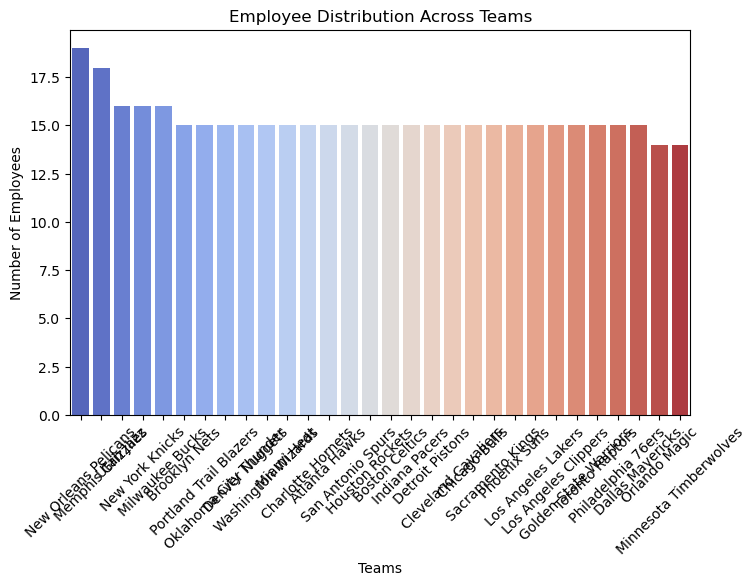

In [39]:
# Count employees per team
team_counts = df["Team"].value_counts()
team_percentage = (team_counts / len(df)) * 100

# Display results
team_df = pd.DataFrame({"Team": team_counts.index, "Employee Count": team_counts.values, "Percentage": team_percentage.values})
print(team_df)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=team_counts.index, y=team_counts.values, hue=team_counts.index, palette="coolwarm", legend=False)
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Teams")
plt.xticks(rotation=45)
plt.show()


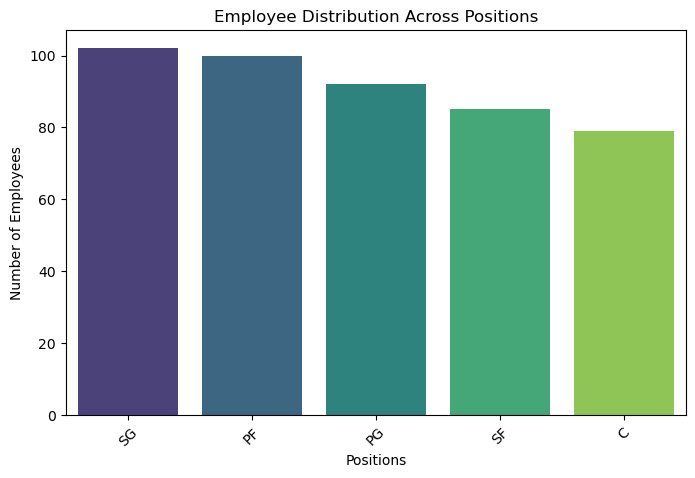

In [51]:
# Employee Segregation Based on Position

# Count employees per position
position_counts = df["Position"].value_counts()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=position_counts.index, y=position_counts.values, hue=position_counts.index, palette="viridis", legend=False)
plt.xlabel("Positions")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Positions")
plt.xticks(rotation=45)
plt.show()


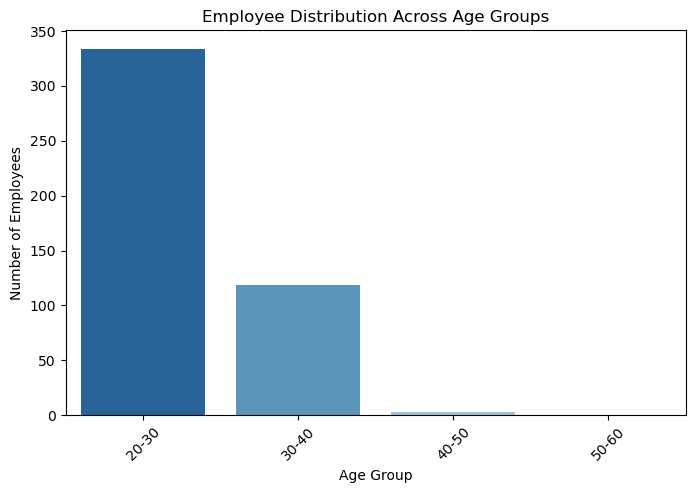

In [57]:
# Define age groups
bins = [20, 30, 40, 50, 60]
labels = ["20-30", "30-40", "40-50", "50-60"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Count employees in each age group
age_group_counts = df["Age_Group"].value_counts()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(
    x=age_group_counts.index, 
    y=age_group_counts.values, 
    hue=age_group_counts.index, 
    palette="Blues_r", 
    legend=False 
)
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Age Groups")
plt.xticks(rotation=45)
plt.show()



Top 3 Teams with Highest Salary Expenditure:
Team
Cleveland Cavaliers      106988689.0
Los Angeles Clippers      94854640.0
Oklahoma City Thunder     93765298.0
Name: Salary, dtype: float64

Top 3 Positions with Highest Salary Expenditure:
Position
C     466377332.0
PG    446848971.0
PF    442560850.0
Name: Salary, dtype: float64
Top 3 Teams with Highest Salary Expenditure:
Team
Cleveland Cavaliers      106988689.0
Los Angeles Clippers      94854640.0
Oklahoma City Thunder     93765298.0
Name: Salary, dtype: float64

Top 3 Positions with Highest Salary Expenditure:
Position
C     466377332.0
PG    446848971.0
PF    442560850.0
Name: Salary, dtype: float64


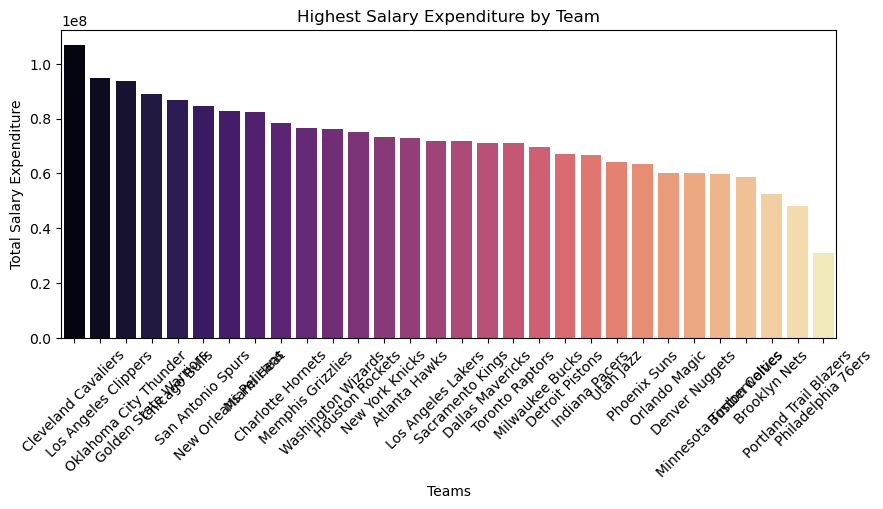

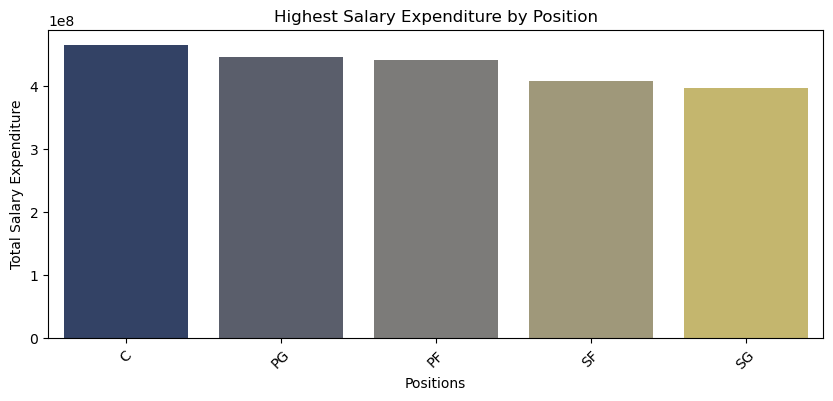

In [103]:
# Total salary expenditure by team
# Group by team and sum salaries
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)

# Group by position and sum salaries
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

print("Top 3 Teams with Highest Salary Expenditure:")
print(team_salary.head(3))

print("\nTop 3 Positions with Highest Salary Expenditure:")
print(position_salary.head(3))


# Visualization
# Total salary expenditure by team
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

print("Top 3 Teams with Highest Salary Expenditure:")
print(team_salary.head(3))

print("\nTop 3 Positions with Highest Salary Expenditure:")
print(position_salary.head(3))

# Visualization
plt.figure(figsize=(10, 4))
sns.barplot(x=team_salary.index, y=team_salary.values, hue=team_salary.index, palette="magma", legend=False)
plt.xlabel("Teams")
plt.ylabel("Total Salary Expenditure")
plt.title("Highest Salary Expenditure by Team")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=position_salary.index, y=position_salary.values, hue=position_salary.index, palette="cividis", legend=False)
plt.xlabel("Positions")
plt.ylabel("Total Salary Expenditure")
plt.title("Highest Salary Expenditure by Position")
plt.xticks(rotation=45)
plt.show()



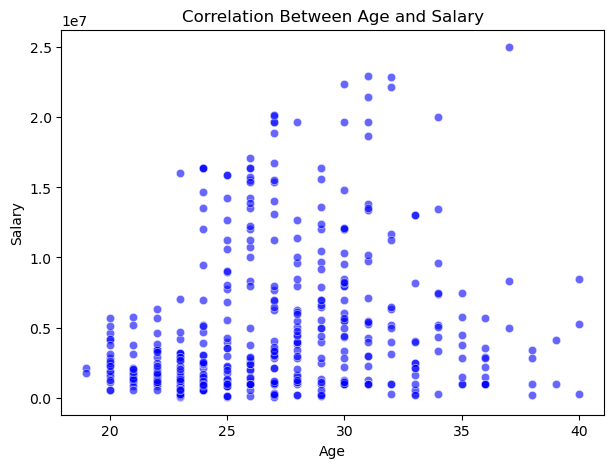

Correlation between Age and Salary: 0.21


In [107]:
# Correlation Between Age and Salary

# Scatter plot to show correlation between age and salary
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"], alpha=0.6, color='blue')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()

# Check correlation coefficient
correlation = df["Age"].corr(df["Salary"])
print(f"Correlation between Age and Salary: {correlation:.2f}")
